Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
    1. Traçando secantes e tangentes (derivadas)
    1. Animações e aproximações: algoritmo de secantes para achar zeros _vs_ Newton
    1. Funções de $\mathbf{R}^2$ em $\mathbf{R}$: planos secantes e tangentes
    1. **Iteração de funções reais, métodos de ponto fixo**
    1. **Iteração de funções complexas: Julia e Mandelbrot**

# Métodos iterativos

Informalmente, um método iterativo consiste na repetição de um mesmo procedimento,
esperando com isso se aproximar cada vez mais da resposta a um problema dado.
Formalmente, consiste na iteração de uma função $f : X \to X$,
onde $X$ é o **espaço de estados** do método:
ou seja, a partir de um ponto inicial $x_0$,
estudamos a seqüência dos pontos
$$\begin{align}
x_1     & = f(x_0)\\
x_2     & = f(x_1) = f^2(x_0) \\
\vdots  & \phantom{= f(x_1) = } \vdots \\
x_{n+1} & = f(x_n) = f^2(x_{n-1}) = \ldots = f^n(x_0)\\
\vdots  & \phantom{= f(x_1) = } \vdots
\end{align}$$

Já vimos vários métodos iterativos nas aulas passadas,
essencialmente para encontrar raízes: bisseção, Newton, Newton-secante.
Vamos agora estudar com mais detalhes o comportamento _geral_ dos métodos iterativos,
também conhecidos como métodos de ponto fixo,
porque em geral eles terminam (e nós dizemos, _convergem_)
quando ele se aproxima de um ponto $x$ tal que $f(x) = x$.

## Exemplo

Seja $f(x) = \cos(x)$, com espaço de estados $\mathbf{R}$.
Ao iterarmos $f$, obtemos uma seqüência:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = 0
pontos = []
for i in range(10):
    pontos.append(x)
    x = cos(x)
print (pontos)

[0, 1.0, 0.54030230586813977, 0.85755321584639344, 0.65428979049777913, 0.79348035874256562, 0.70136877362275651, 0.76395968290065419, 0.72210242502670774, 0.75041776176376052]


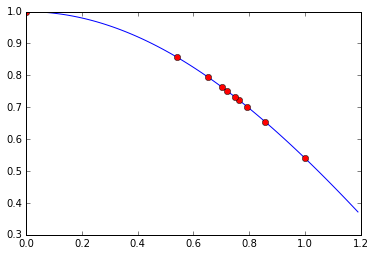

In [3]:
x = arange(0,1.2,0.01)
plot(x, cos(x))

pontos = array(pontos)
plot(pontos, cos(pontos), 'ro');

Vejamos em que ordem estes pontos são obtidos.
O método clássico consiste em ligar um ponto $(x, f(x))$ do gráfico à diagonal, em $(f(x), f(x))$,
e de volta ao gráfico, mas "no ponto seguinte" em $(f(x), f(f(x)))$.

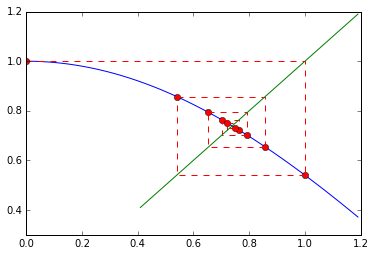

In [4]:
plot(x, cos(x))
plot(pontos, cos(pontos), 'ro')
for p in pontos:
    plot([p,cos(p),cos(p)], [cos(p),cos(p),cos(cos(p))], 'r--')

# Diagonal
x6 = [xi for xi in x if xi > 0.4]
plot(x6,x6);

## Análise

Se $f$ tem um ponto fixo, podemos querer saber se os iterados de $f$ convergem para este ponto fixo.
A primeira análise será, como sempre, com a derivada.
Se $f$ for diferenciável em $p$, seu ponto fixo,
então, temos
$$ f(p+h) = f(p) + h f'(p) + o(h). $$
Se temos $x_n = p + h_n$, a equação acima nos dá:
$$ x _ {n+1} = f(x_n) = p + h_n f'(p) + o(h_n)$$
e portanto
$$ h _ {n+1} = h_n f'(p) + o(h_n).$$
Assim, se $\lvert f'(p)\rvert < 1$, temos que $h_n$ decresce mais rápido que uma P.G.,
e portanto converge para zero, e $x_n \to p$.
Inversamente, se $\lvert f'(p)\rvert > 1$, temos que $h_n$ aumenta.
Enfim, o caso $\lvert f'(p)\rvert = 1$ não permite concluir.

### Terminologia

Os pontos para os quais a iteração converge (desde que comecemos próximos a ele)
são conhecidos como pontos fixos _atratores_.
Os pontos a partir dos quais a iterção diverge (quando começamos próximos, mas não iguais!)
são pontos fixos _repulsores_.

Os pontos fixos $p$ para os quais $f'(p) = 0$ são chamados _super-atratores_.
As seqüências convergentes para $p$ vão mais rápido do que qualquer progressão geométrica.

## O método de Newton, bis

Podemos ver analisar o método de Newton como uma iteração de ponto fixo:
dado $x$, calculamos $z = x - \frac{f(x)}{f'(x)}$.
a função de iteração será $F(x) = z(x)$.
Um ponto fixo desta iteração é tal que $p = F(p) = p - \frac{f(p)}{f'(p)}$
e portanto $f(p) = 0$.

O que é interessante é que a derivada de $F$ em $p$ é
$$ 1 - \frac{f'(p)}{f'(p)} + \frac{f(p) f''(p)}{\big( f'(p) \big)^2} = 0.$$

Assim, o método de Newton é _super-atrator_,
o que explica a sua convergência.

## O método da secante, bis

Também podemos considerar o método da secante como uma iteração de ponto fixo.
O problema é que temos a cada passo não um, mas **dois** pontos de entrada,
para apenas um novo ponto.
Para tratar de "ponto fixo", devemos entender o passo como a substituição simultânea
$$ \begin{align}
  x & = y \\
  y & = z = \text{interseção da reta determinada por $x$ e $y$} = \frac{x f(y) - y f(x) }{f(y) - f(x)}
\end{align} $$

Assim, temos uma iteração cujo espaço de estados é $\mathbf{R}^2$.
O ponto fixo está relacionado com uma raiz de $f(x) = 0$ que chamamos $p$,
mas agora ele é $(p,p)$.

Assim, temos $F(x,y) = (y, \phi(x,y))$.
Para compreender o comportamento de $F$ na vizinhança do seu ponto fixo, vamos estudar a derivada.
$$ F'(x,y) = \begin{pmatrix} 0 & 1 \\ \partial_1\phi(x,y) & \partial_2\phi(x,y) \end{pmatrix} $$

Como $\phi(x,y) = \phi(y,x)$ (a reta determinada por $x$ e $y$ não depende da ordem!),
podemos calcular a derivada em relação a $x$:
$$\begin{align*}
\frac{\partial}{\partial x} \phi(x,y) & = \frac{\partial}{\partial x} \phi(y,x) \\
(\partial_1 \phi)(x,y) & = (\partial_2 \phi)(y,x)
\end{align*}$$

Assim, $(\partial_2 \phi)(x,y) = (\partial_1 \phi)(y,x)$ e basta calcular $\partial_1\phi$.

Vamos supor que $f'(p) \neq 0$, e que, portanto, numa vizinhança de $p$
(em que estarão $x$ e $y$)
existe uma inversa para $f$, que chamaremos $g$.
Assim, da mesma forma que $f(y) - f(x) \sim (y-x)f'(x)$, teremos
$$ y - x \sim (f(y) - f(x))g'(f(x)) + \frac{(f(x) - f(y))^2}{2} g''(f(x)). $$

Com isto, podemos mostrar que
$$ \partial_1\phi(x,y) = \frac{g''(f(\xi)) f(y)}{2},$$
onde $\xi$ está entre $x$ e $y$.
Substituindo $x = y = p$, vemos que $\partial_1\phi(p,p) = 0$
e, pela simetria acima, também será $\partial_2\phi(p,p) = 0$.

Ou seja, em torno do ponto fixo, a iteração se comporta de forma similar à multiplicação pela matriz
$$ \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix} $$

Como esta não é a matriz zero, a convergência não será quadrática, pois ainda há uma dependência linear.
Entretanto, como os valores próprios são zero,
a convergência será _super-linear_, como no caso do método de Newton.

# Funções complexas

Nada nos impediu de iterar funções de $\mathbf{R}^2$,
e portanto vamos nos aventurar nas funções de $\mathbf{C}$,
onde há fenômenos bastante especiais e espetaculares.

## Os conjuntos de Fatou e Julia

Seja $f$ uma função complexa.
Pierre Fatou (1878-1929) e Gaston Julia (1893-1978)
estudaram o caso de iterações de polinômios e frações racionais ($f(x) = P(x)/Q(x)$),
e deram seus nomes a dois conjuntos importantes associados a uma função.

O conjunto de **Fatou** é o conjunto dentro do qual as iterações "convergem",
enquanto o conjunto de **Julia** é o conjunto de "caos":
pequenas modificações do ponto inicial levam a distâncias muito grandes após um número suficiente de iterações.

### O exemplo clássico: $f(z) = z^2$

Se $|z| < 1$, temos que os iterados de $z$ convergem para zero, e da mesma forma qualquer ponto próximo,
mas ainda de norma menor do que $1$, converge para zero.
Assim, o disco unitário (aberto) está no conjunto de Fatou.
Se $|z| > 1$, os iterados convergem para infinito,
e neste caso também não há caos.
Por outro lado, se $|z| = 1$, pequenas perturbações podem manter os pontos com norma um ou não.
Assim, dependendo de como a perturbação ocorrer, podemos observar comportamentos muito diferentes,
e o círculo unitário é o conjunto de Julia.

## Desenhando os conjuntos de Julia e Fatou

O resultado fundamental de Fatou e Julia é que estes conjuntos, de definição independente,
são, na verdade, complementares um do outro.
Além disso, se $f$ é um polinômio, também sabemos que o conjunto de Julia é a
_fronteira da bacia de atração do infinito_.

Isso nos dá um método para tentar decidir se um ponto está ou não no conjunto de Julia:
iteramos este ponto várias vezes, e vemos qual é a norma dele.
Se esta norma for bastante grande, podemos acreditar que ele realmente diverge para o infinito.
Se esta norma for pequena, vamos acreditar que ele não converge.

In [5]:
def julia(f, z, maxiter=100, maxnorm=10):
    for i in range(maxiter):
        if abs(z) > maxnorm: return log(i)
        z = f(z)
    return log(maxiter) + log(maxnorm/abs(z))

In [20]:
def f(z): return z*z + 0.30 + 0.02j

In [21]:
prec = 0.005
xs = arange(  -1,  1, prec)
ys = arange(-1.5,1.5, prec)

res = []
for y in ys:
    l = []
    for x in xs:
        l.append(julia(f, x + y*1j))
    res.append(l)

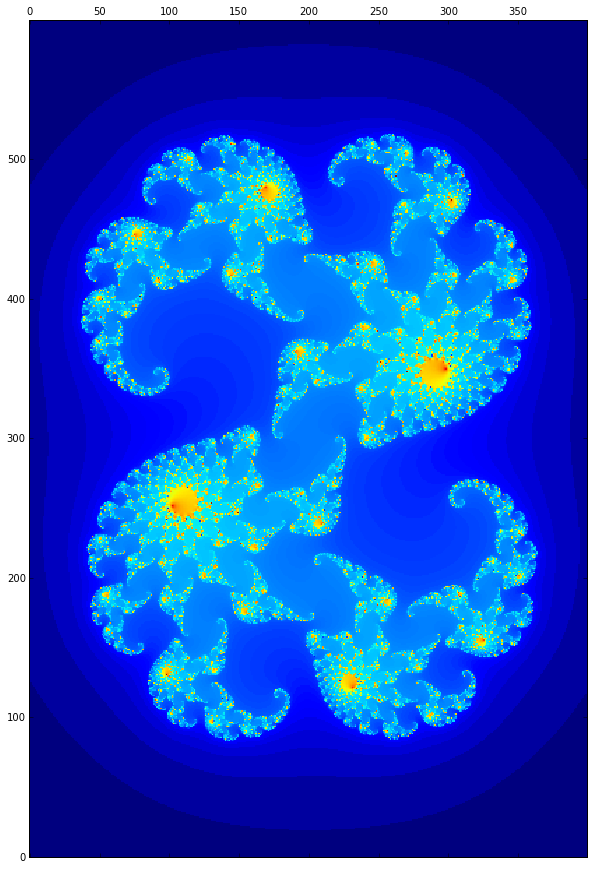

In [22]:
fig = figure(figsize=(10,15))
matshow(res, fig.number, origin='lower')

## O conjunto de Mandelbrot

O conjunto de Mandelbrot (Benoît Mandelbrojt, 1924-2010) tem a ver com iteração, mas de forma mais complicada.

Cada função quadrática $f(z) = Az^2 + Bz + C$ possui um conjunto de Julia,
e o aspecto global deste é o mesmo que o de um conjunto de Julia de uma certa função
$\tilde{f}(z) = z^2 + c(A,B,C)$.
O que Mandelbrot fez foi, então, classificar não os **pontos** conforme eles vão para o infinito ou não,
mas os valores de **c** tais que o conjunto de Julia é conexo ou não.
A coincidência aqui é que $c$ também percorre valores complexos,
e portanto também podemos ver um desenho no plano.

O teorema fundamental para desenhar o conjunto de Mandelbrot é o seguinte.
Seja $f_c(z) = z^2 + c$;
o conjunto de Julia de $f_c$ será desconexo
sempre que os iterados de $0$ convergirem para o infinito.

In [9]:
def mandel(c, maxiter=100):
    z = 0
    for i in range(maxiter):
        if (abs(z) > 5): return i
        z = z*z + c
    return i

In [10]:
prec = 0.01
xs = arange(-2.5, 1,   prec)
ys = arange(-1.2, 1.2, prec)

m = []
for y in ys:
    l = []
    for x in xs:
        l.append(mandel(x + y*1j))
    m.append(l)

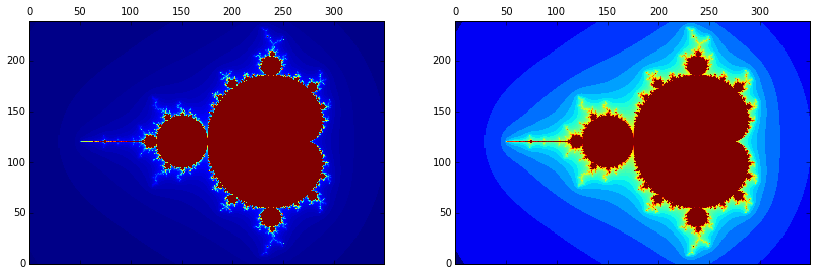

In [11]:
fig = figure(figsize=(14,8))
ax = subplot(1,2,1)
ax.matshow(m, origin='lower');
ax = subplot(1,2,2)
ax.matshow([[log(v) for v in r] for r in m], origin='lower');

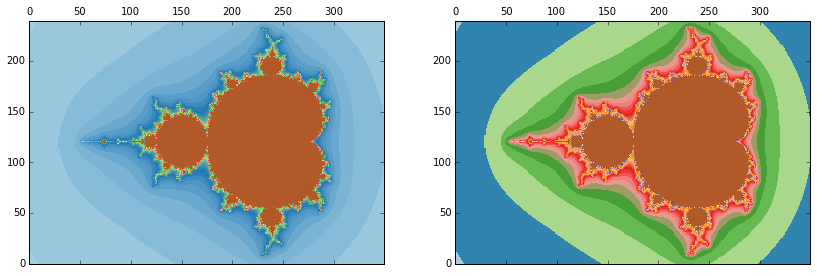

In [12]:
fig = figure(figsize=(14,8))
ax = subplot(1,2,1)
ax.matshow(m, origin='lower', cmap='Paired');
ax = subplot(1,2,2)
ax.matshow([[log(v) for v in r] for r in m], origin='lower', cmap='Paired');

In [13]:
prec = 0.0005
xs = arange(-0.6, -0.3, prec)
ys = arange( 0.4,  0.7, prec)

m_zoom = []
for y in ys:
    l = []
    for x in xs:
        l.append(mandel(x + y*1j, maxiter=200))
    m_zoom.append(l)

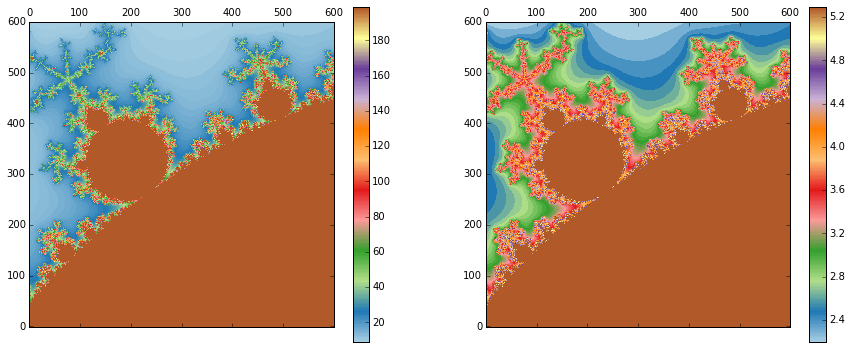

In [14]:
fig = figure(figsize=(15,6))
ax = subplot(1,2,1)
s = ax.matshow(m_zoom, origin='lower', cmap='Paired')
fig.colorbar(s, ax=ax)
ax = subplot(1,2,2)
s = ax.matshow([[log(v) for v in r] for r in m_zoom], origin='lower', cmap='Paired')
fig.colorbar(s, ax=ax);

In [15]:
prec = 0.0002
xs = arange(-0.55, -0.47, prec)
ys = arange( 0.5,   0.55, prec)

m_zoom2 = []
for y in ys:
    l = []
    for x in xs:
        l.append(mandel(x + y*1j, maxiter=500))
    m_zoom2.append(l)

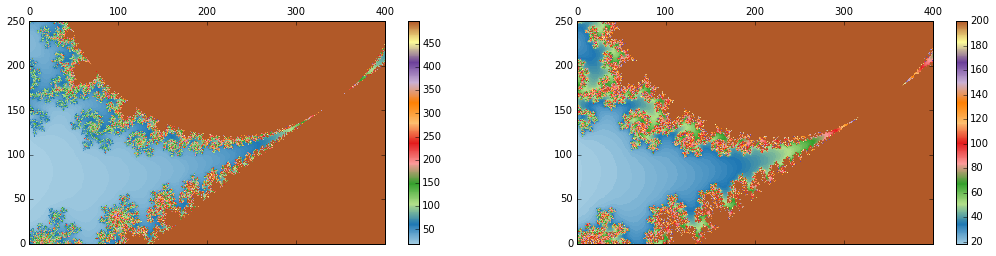

In [16]:
fig = figure(figsize=(18,4))
ax = subplot(1,2,1)
s = ax.matshow(m_zoom2, origin='lower', cmap='Paired')
fig.colorbar(s, ax=ax)
ax = subplot(1,2,2)
s = ax.matshow([[min(v,200) for v in r] for r in m_zoom2], origin='lower', cmap='Paired')
fig.colorbar(s, ax=ax);